<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 - Kevin Camilo Becerra Walteros (201812779)

MINE-4101: Ciencia de Datos Aplicada  
Universidad de los Andes  

**Dataset:** AirBnb Listings - Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. Este dataset incluye información sobre propiedades listadas en Airbnb en la Ciudad Autónoma de Buenos Aires. Contiene puntos de datos como barrio, tipo de propiedad, precio por noche, número de reseñas, calificaciones de reseñas, disponibilidad, amenidades y más.

**Contexto de negocio:** Estrategia de inversión inmobiliaria y alquiler vacacional. Eres consultor para individuos y empresas interesados en invertir en propiedades para alquileres en Airbnb. Quieren identificar los barrios más rentables, las estrategias de precios óptimas y comprender los factores que contribuyen a obtener reseñas positivas y reservas frecuentes.

In [2084]:
#Librerías a importar para poder usar dentro del notebook
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import pearsonr, spearmanr

In [2085]:
#Configuración de Pandas para ampliar el número de columnas y filas a mostrar
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Carga de datos:

In [2086]:
# Cargar el archivo CSV como un dataframe con encoding UTF-8 y separador por comas
listings_df = pd.read_csv('./listings.csv', encoding = "UTF-8", sep = ',')

A continuación se previsualiza una muestra aleatoria de 5 registros:

In [2087]:
# Showing a sample of n rows
listings_df.sample(5) 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
26820,1015352330344002072,https://www.airbnb.com/rooms/1015352330344002072,20240629050041,2024-06-30,previous scrape,"Dpto moderno, lindo y cómodo",The apartment is maximum for two people people...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,69066683,https://www.airbnb.com/users/show/69066683,Magali,2016-04-26,"Buenos Aires, Argentina",NaN,NaN,NaN,33%,f,https://a0.muscache.com/im/pictures/user/59a56...,https://a0.muscache.com/im/pictures/user/59a56...,NaN,1.00,3.00,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.59,-58.42,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.00,NaN,"[""Refrigerator"", ""Shared pool"", ""Air condition...",NaN,1,30,1,1,30,30,1.00,30.00,NaN,t,28,58,88,88,2024-06-30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
10204,51551702,https://www.airbnb.com/rooms/51551702,20240629050041,2024-06-29,city scrape,Departamento en Recoleta,Excellent apartment in Recoleta. 1 Bedroom wit...,"Very quiet neighborhood, close to Av Santa Fe ...",https://a0.muscache.com/pictures/878b450f-0c62...,360193861,https://www.airbnb.com/users/show/360193861,Guadalupe,2020-08-03,NaN,NaN,within an hour,100%,75%,t,https://a0.muscache.com/im/pictures/user/32875...,https://a0.muscache.com/im/pictures/user/32875...,Barrio Norte,1.00,1.00,"['email', 'phone']",t,t,"Recoleta, Buenos Aires, Argentina",Recoleta,NaN,-34.59,-58.40,Entire rental unit,Entire home/apt,4,1.00,1 bath,1.00,1.00,"[""Microwave"", ""Refrigerator"", ""Hair dryer"", ""E...","$24,584.00",7,1125,7,7,1125,1125,7.00,1125.00,NaN,t,4,25,55,145,2024-06-29,10,6,1,2021-12-14,2024-06-12,4.60,4.80,4.30,4.60,5.00,5.00,4.70,NaN,f,1,1,0,0,0.32
36034,1167645923891976323,https://www.airbnb.com/rooms/1167645923891976323,20240629050041,2024-06-29,city scrape,Dpto. 2 ambientes en Núñez c /cochera cubierta,Excellent 2 environments ideal for 4 people. l...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,555222194,https://www.airbnb.com/users/show/555222194,Alan,2024-01-08,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,3.00,3.00,"['email', 'phone']",t,t,NaN,Nuñez,NaN,-34.54,-58.47,Entire rental unit,Entire home/apt,4,1.00,1 bath,2.00,1.00,"[""Pets allowed"", ""Air conditioning"", ""Washer"",...","$27,316.00",5,365,5,5,365,365,5.00,365.00,NaN,NaN,29,59,89,89,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
17972,829664089585978625,https://www.airbnb.com/rooms/829664089585978625,20240629050041,2024-06-29,city scrape,Monoambiente súper!,This special place is close to everything-it's...,NaN,https://a0.muscache.com/pictures/0dc1053e-ee4d...,496366652,https://ww

## 2. Entendimiento inicial de los datos:
Generar un breve reporte de entendimiento inicial de datos en donde destaque las dimensiones del dataset, los tipos de datos que contiene y el top 5 de los atributos que considera más importantes para el análisis. Por cada uno de los 5 atributos incluya algunos elementos básicos de su comportamiento o distribución (análisis univariado).

Se abordarán los siguientes items:

* Exploración y perfilamiento de datos
    * Carga
    * Descripción básica
    * Perfilamiento
    * Visualización
    
* Calidad de datos e ideas de preparación
  * Completitud
  * Unicidad / Duplicidad
  * Validez / Estandarizacón


In [2088]:
# Dimensiones del dataset
listings_df.shape

(37035, 75)

Se tienen 37035 registros, en este caso propiedades, y 75 columnas en total.

In [2089]:
# Columnas que contiene el dataset
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [2090]:
# Se muestran los tipos de datos de las columnas
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [2091]:
# Se muestran el número de valores únicos de ids, que nos puede ayudar para diagnosticar duplicados
listings_df["id"].nunique()

37035

Notamos que el número de ids únicos coincide con el número total de registros. Por lo tanto, decimos que no hay registros duplicados.

Ahoram, revisamos la cantidad de no nulos que tiene cada atributo.

In [2092]:
# Atributos con tipo de dato asociado y su número de no nulos
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37035 entries, 0 to 37034
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37035 non-null  int64  
 1   listing_url                                   37035 non-null  object 
 2   scrape_id                                     37035 non-null  int64  
 3   last_scraped                                  37035 non-null  object 
 4   source                                        37035 non-null  object 
 5   name                                          37035 non-null  object 
 6   description                                   36014 non-null  object 
 7   neighborhood_overview                         18958 non-null  object 
 8   picture_url                                   37034 non-null  object 
 9   host_id                                       37035 non-null 

In [2093]:
# Usamos esta función para saber el porcentaje de datos nulos en cada atributo
(listings_df.isnull().sum()/len(listings_df))*100

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
source                                           0.00
name                                             0.00
description                                      2.76
neighborhood_overview                           48.81
picture_url                                      0.00
host_id                                          0.00
host_url                                         0.00
host_name                                        0.01
host_since                                       0.01
host_location                                   22.57
host_about                                      47.19
host_response_time                              19.93
host_response_rate                              19.93
host_acceptance_rate                            11.24
host_is_superhost           

Notamos que hay 3 columnas con datos nulos significativos (>90%). 

De acuerdo con esto, se eliminarán las siguientes columnas ya que no tiene sentido imputarlas y tampoco aportan mucho a nuestro análisis: neighbourhood_group_cleansed, calendar_updated, license.

In [2094]:
columns_to_drop = ['neighbourhood_group_cleansed', 'calendar_updated', 'license']
listings_df.drop(columns=columns_to_drop, inplace=True)

Para el propósito del taller solo se necesitan elegir los 5 atributos más importantes o de mayor relevancia para poder sugerir decisiones basadas en datos a través del análisis estadístico. Se eligieron:
* neighbourhood_cleansed
* property_type
* price
* number_of_reviews
* review_scores_rating

In [2095]:
columns_stat_analysis = ['neighbourhood_cleansed', 'property_type', 'price', 'number_of_reviews', 'review_scores_rating']
listings_df = listings_df[columns_stat_analysis]

In [2096]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37035 entries, 0 to 37034
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  37035 non-null  object 
 1   property_type           37035 non-null  object 
 2   price                   34005 non-null  object 
 3   number_of_reviews       37035 non-null  int64  
 4   review_scores_rating    29760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [2097]:
listings_df.isnull().sum()

neighbourhood_cleansed       0
property_type                0
price                     3030
number_of_reviews            0
review_scores_rating      7275
dtype: int64

Notamos que existen problemas de completitud con las variables 'review_scores_ratings' y 'price'. 

* Revisando la variable 'review_scores_rating' vemos que los registros nulos corresponden a cuyo número de reviews es 0. Por lo tanto, aplicaremos una estrategia de imputación por categoría, es decir, los valores nulos se reemplazarán por la mediana del 'review_scores_rating' para las propiedades con el mismo barrio (neighbourhood_cleansed).

* Con respecto a la variable 'price' vemos que las propiedades tienen buenas calificaciones y parecen ser bien valoradas, por lo cual se considera imputar los precios nulos con la mediana de price en función de cada combinación de barrio y tipo de propiedad. Con el fin de mantener la información en el dataset sin perder registros y a su vez puede ser más representativo que usar una sola mediana global.

In [2098]:
#Calcular la media de 'review_scores_rating' por cada grupo de 'neighbourhood_cleansed'
median_by_neighbourhood_cleansed = listings_df.groupby('neighbourhood_cleansed')['review_scores_rating'].median()


#Llenar los valores nulos en 'review_scores_rating' basado en la mediana de los valores por cada 'neighbourhood_cleansed' agrupado
listings_df['review_scores_rating'] = listings_df.apply(
    lambda row: median_by_neighbourhood_cleansed[row['neighbourhood_cleansed']] if pd.isnull(row['review_scores_rating']) else row['review_scores_rating'],
    axis=1
)

In [2099]:
# Verificamos los barrios con score review ratings nulos y sus conteos
null_count_by_neighbourhood_cleansed = listings_df[listings_df['review_scores_rating'].isnull()]['neighbourhood_cleansed'].value_counts()
print(null_count_by_neighbourhood_cleansed)

neighbourhood_cleansed
Villa Riachuelo    4
Villa Soldati      1
Name: count, dtype: int64


De acuerdo con esto, eliminamos estos dos barrios ('Villa Riachuelo', 'Villa Soldati') porque las propiedades que están ahí no tienen reviews y también porque no es un valor tan significativo dentro del dataset.

In [2100]:
# Eliminar registros con 'review_scores_rating' nulo
listings_df = listings_df.dropna(subset=['review_scores_rating'])

In [2101]:
# Verificamos que no hayan más nulos en la columna 'review_scores_rating'
listings_df.isnull().sum()

neighbourhood_cleansed       0
property_type                0
price                     3027
number_of_reviews            0
review_scores_rating         0
dtype: int64

In [2102]:
# Filtramos las filas con 'price' nulo
null_price = listings_df[listings_df['price'].isnull()]

# Contar la distribución por barrio
null_distribution = null_price['neighbourhood_cleansed'].value_counts()

# Mostrar la distribución de precios nulos por barrio
print("Distribución de precios nulos por barrio:")
print(null_distribution)

Distribución de precios nulos por barrio:
neighbourhood_cleansed
Palermo              766
Recoleta             491
Retiro               188
Belgrano             169
Monserrat            145
Almagro              141
San Nicolas          138
Balvanera            135
Nuñez                101
San Telmo             89
Caballito             87
Villa Crespo          80
Colegiales            76
Constitucion          67
Chacarita             46
Villa Urquiza         45
San Cristobal         31
Saavedra              30
Puerto Madero         27
Boca                  15
Boedo                 15
Coghlan               14
Villa Ortuzar         14
Barracas              14
Flores                13
Parque Chacabuco      10
Parque Patricios       9
Villa Del Parque       8
Villa Devoto           7
Paternal               7
Villa Santa Rita       5
Villa Real             5
Villa Gral. Mitre      5
Floresta               4
Parque Chas            4
Villa Luro             4
Liniers                4
Villa Puey

Para poder analizarla y proceder con lo que planteamos, se debe convertir su datatype, de object a float; esto con el fin de poder analizar posteriormente su comportamiento como variable numérica y no como categórica.

In [2103]:
# Se crea la columna con el valor del precio en tipo float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
# Se elimina la columna original del dataframe
listings_df = listings_df.drop("price", axis=1)

In [2104]:
# Calcular la mediana de 'price_float' por combinación de barrio y tipo de propiedad
median_by_group = listings_df.groupby(['neighbourhood_cleansed', 'property_type'])['price_float'].median()

# Llenar los valores nulos en 'price_float' basado en la mediana correspondiente
listings_df['price_float'] = listings_df.apply(
    lambda row: median_by_group[row['neighbourhood_cleansed'], row['property_type']] if pd.isnull(row['price_float']) else row['price_float'],
    axis=1
)

# Verificar si hay más nulos en 'price_float'
nulos_restantes = listings_df['price_float'].isnull().sum()
print(f"Número de precios nulos restantes: {nulos_restantes}")

Número de precios nulos restantes: 62


In [2105]:
# Filtrar los registros con precios nulos después de la imputación
muestra_nulos = listings_df[listings_df['price_float'].isnull()]

# Mostrar una muestra de los registros con precios nulos
print(muestra_nulos[['neighbourhood_cleansed', 'property_type', 'price_float', 'review_scores_rating', 'number_of_reviews']].head())  # Muestra de los primeros 10 registros

    neighbourhood_cleansed           property_type  price_float  \
253              San Telmo   Shared room in hostel          NaN   
276              San Telmo            Private room          NaN   
277              San Telmo            Private room          NaN   
289               Belgrano  Private room in hostel          NaN   
304              San Telmo            Private room          NaN   

     review_scores_rating  number_of_reviews  
253                  4.48                 41  
276                  4.67                  4  
277                  5.00                  2  
289                  4.90                  0  
304                  4.84                  0  


Después de hacer la imputación por mediana de acuerdo a cada combinación de barrio por tipo de propiedad, notamos que siguen habiendo 62 valores de precio nulos. Esto puede suceder debido a que tal vez hayan combinaciones específicas de 'neighbourhood_cleansed' y 'property_type' que no tengan ningún registro con un valor de 'price_float'; ya que si se intenta acceder a una combinación que no existe en median_by_group, se generará un error que no se muestra, y los nulos permanecerán.

Por lo tanto, sabiendo que es un valor pequeño (0.1%) que no afectará significativamente nuestro análisis, procedemos a borrar estos registros.

In [2106]:
#Paso 3: Eliminar las filas con 'price_float' nulo
listings_df = listings_df.dropna(subset=['price_float'])

# Verificamos el nuevo tamaño del DataFrame
print(f"Tamaño del DataFrame después de eliminar nulos en 'price_float': {len(listings_df)}")

Tamaño del DataFrame después de eliminar nulos en 'price_float': 36968


In [2107]:
# Imprimimos una muestra del dataframe con el que se trabajará el análisis
listings_df.sample(10)

,neighbourhood_cleansed,property_type,number_of_reviews,review_scores_rating,price_float
32001,Palermo,Entire rental unit,10,4.90,31868.00
29379,Recoleta,Entire rental unit,0,4.88,34600.00
18174,Palermo,Entire rental unit,34,4.97,31868.00
32450,San Nicolas,Entire rental unit,24,4.96,22863.00
4379,Almagro,Entire rental unit,32,5.00,27316.00
34868,Retiro,Entire rental unit,2,5.00,18730.00
19932,San Nicolas,Entire rental unit,25,4.84,34600.00
3821,San Nicolas,Entire rental unit,251,4.83,27316.00
23817,Belgrano,Entire rental unit,8,4.75,54632.00
7794,Monserrat,Entire rental unit,1,3.00,26000.00


In [2108]:
listings_df.isna().sum()/len(listings_df)

neighbourhood_cleansed   0.00
property_type            0.00
number_of_reviews        0.00
review_scores_rating     0.00
price_float              0.00
dtype: float64

Las imputaciones se realizaron de manera satisfactorio. Finalmente, podemos decir que ser ha garantizado a lo largo del análisis preliminar la unicidad, validez y completitud de los datos. Por lo tanto, empezaremos con el análisis univariado.

## 2.1 Análisis univariado

## Variables categóricas
**1. Atributo Barrio ('neighbourhood_cleansed')**

In [2109]:
listings_df["neighbourhood_cleansed"].unique()

array(['Palermo', 'Nuñez', 'Monserrat', 'Constitucion', 'San Nicolas',
       'Chacarita', 'Recoleta', 'Belgrano', 'Retiro', 'San Telmo',
       'Almagro', 'Villa Crespo', 'Boedo', 'Boca', 'Colegiales',
       'Balvanera', 'Caballito', 'Villa Luro', 'Coghlan',
       'Parque Patricios', 'Villa Devoto', 'San Cristobal',
       'Parque Chacabuco', 'Villa Urquiza', 'Saavedra', 'Puerto Madero',
       'Flores', 'Monte Castro', 'Villa Gral. Mitre', 'Villa Ortuzar',
       'Barracas', 'Velez Sarsfield', 'Villa Del Parque', 'Floresta',
       'Villa Pueyrredon', 'Paternal', 'Villa Santa Rita', 'Liniers',
       'Parque Avellaneda', 'Parque Chas', 'Villa Lugano', 'Agronomia',
       'Nueva Pompeya', 'Mataderos', 'Versalles', 'Villa Real'],
      dtype=object)

Notamos que no existen problemas de duplicidad por errores de digitación (typos).

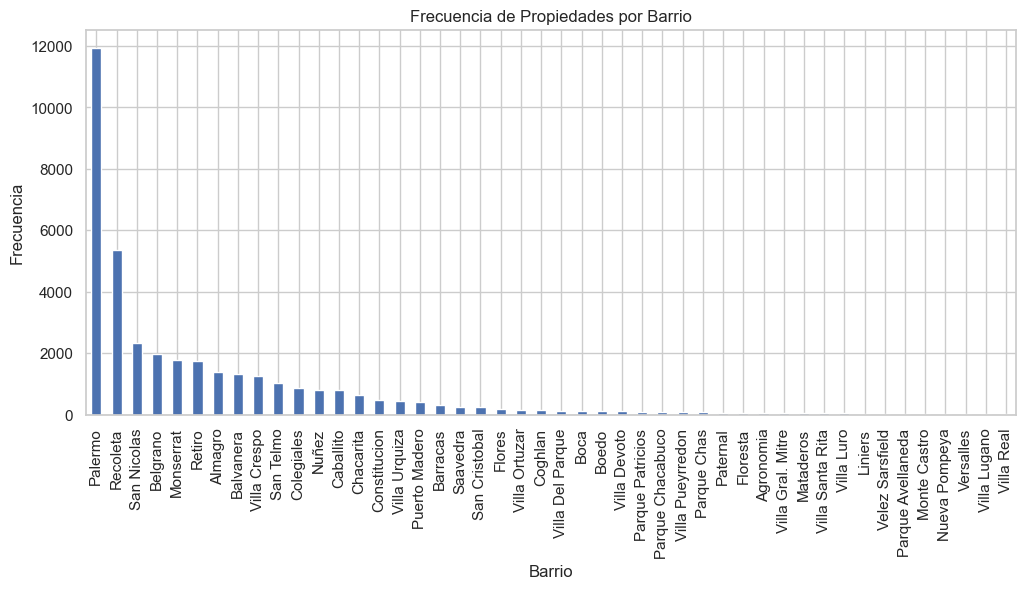

In [2110]:
# Gráfico donde se muestran las frecuencias de propiedades por barrio
plt.figure(figsize=(12, 5))
neighbourhood_counts = listings_df['neighbourhood_cleansed'].value_counts()
neighbourhood_counts.plot(kind='bar')
plt.title('Frecuencia de Propiedades por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.show()

De igual forma realizamos un gráfico con el top 10 de de frecuencia de propiedades por barrio para tener un mejor panorama de los datos.

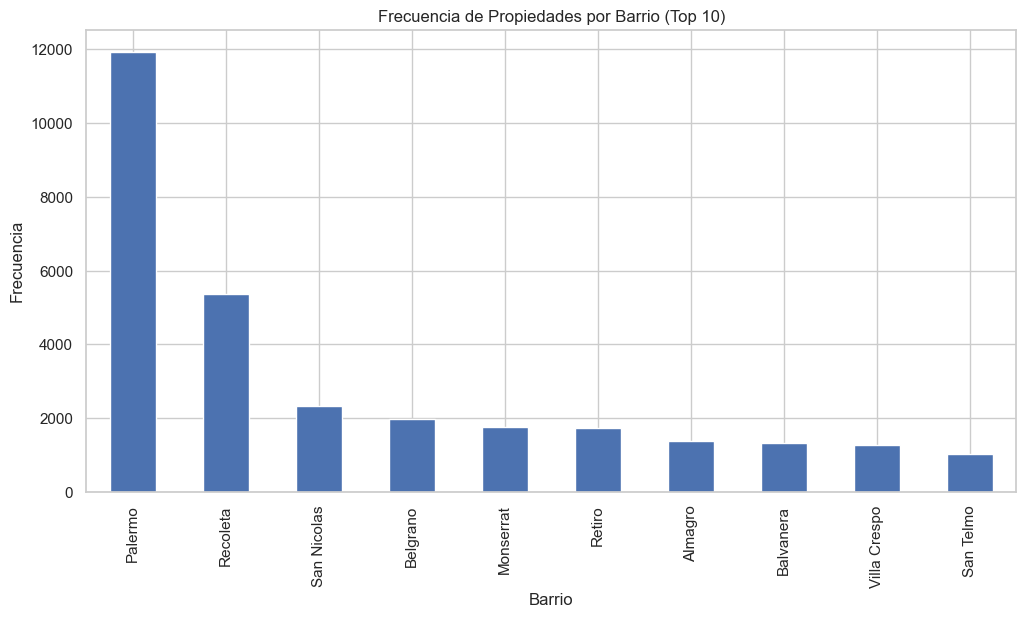

In [2111]:
# Gráfico donde se muestran las frecuencias de propiedades por barrio (top 10)
plt.figure(figsize=(12, 6))
neighbourhood_counts = listings_df['neighbourhood_cleansed'].value_counts()
neighbourhood_counts.head(10).plot(kind='bar')
plt.title('Frecuencia de Propiedades por Barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.show()

Con los anteriores gráficos vemos la distribución de las propiedades por barrio, con lo que nos da una idea de los barrios donde existen más y menos oferta de propiedades.

**2. Atributo Tipo de Propiedad ('property_type')**

In [2112]:
listings_df["property_type"].unique()

array(['Entire condo', 'Entire rental unit',
       'Private room in rental unit', 'Entire loft',
       'Private room in condo', 'Entire serviced apartment',
       'Entire place', 'Private room in home', 'Entire townhouse',
       'Private room in bed and breakfast', 'Entire home',
       'Private room in casa particular', 'Entire villa',
       'Shared room in rental unit', 'Shared room in guest suite',
       'Camper/RV', 'Private room in guesthouse', 'Private room in villa',
       'Private room in serviced apartment', 'Room in hostel',
       'Private room in townhouse', 'Shared room in home',
       'Private room in guest suite', 'Shared room in hostel',
       'Casa particular', 'Room in serviced apartment',
       'Shared room in serviced apartment', 'Shared room in villa',
       'Private room in loft', 'Entire guesthouse',
       'Entire vacation home', 'Room in boutique hotel',
       'Shared room in loft', 'Entire bungalow', 'Room in hotel',
       'Shared room in townhous

Debido a que notamos que son bastantes tipos de propiedad, mostraremos solo el top 10.

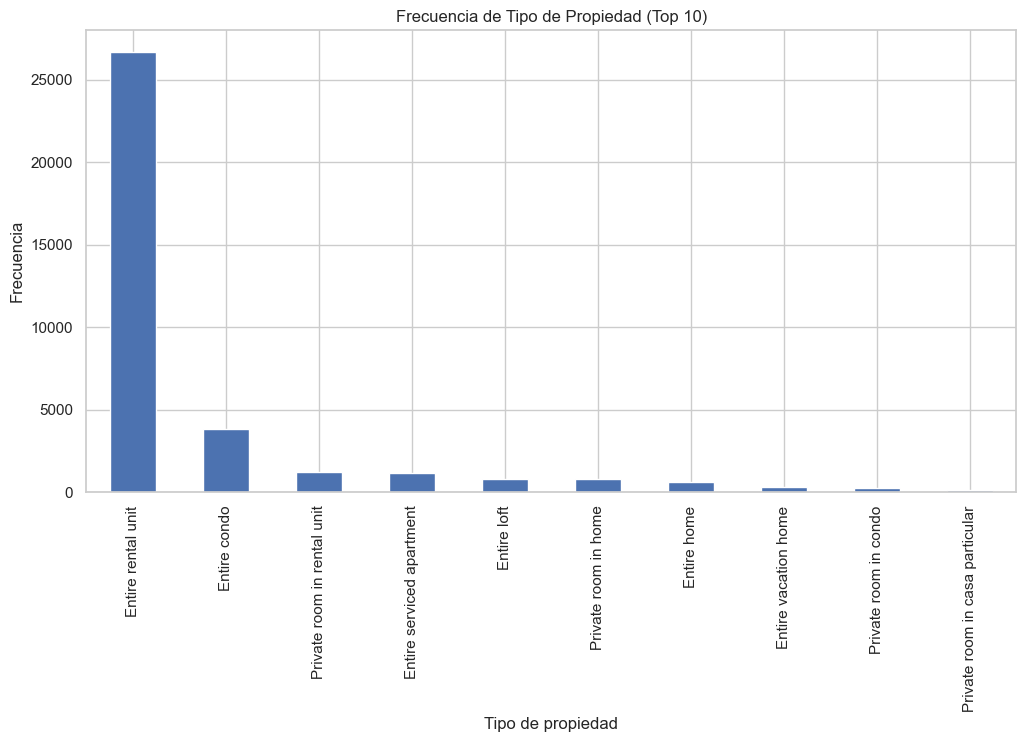

In [2113]:
# Gráfico donde se muestran las frecuencias del tipo de propiedad
plt.figure(figsize=(12, 6))
property_type_counts = listings_df['property_type'].value_counts()
property_type_counts.head(10).plot(kind='bar')
plt.title('Frecuencia de Tipo de Propiedad (Top 10)')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar que entre el 60% y el 70% de las propiedades totales en el dataset corresponden a 'Entire rental unit'. 

Este dato es interesante y será de utilidad para la parte final del taller al momento de recomendar alternativas de inversión.

## Variables cuantitativas
**3. Atributo precio ('precio')**

In [2114]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(f"median     {listings_df['price_float'].median()}")
print(f"mode       {listings_df['price_float'].mode()[0]}")
print(listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))

median     31741.0
mode       27316.0
count      36968.00
mean       63424.14
std       881943.94
min          260.00
5%         15397.00
25%        23218.50
50%        31741.00
75%        44224.00
95%       100158.00
max     91052574.00
Name: price_float, dtype: float64


Notamos que hay la media es 63,424.14, lo que es bastante alto comparado con la mediana de 31,741.0. Esto sugiere que hay algunos valores extremadamente altos que están sesgando la media hacia arriba. Por otro lado, la desviación estándar es de 881,943.94, lo que indica una gran dispersión en los precios, también señalando la presencia de valores extremos.

* El valor mínimo es de 260, lo cual es razonable; pero el valor máximo es 910,52574, que es extremadamente alto y casi con certeza un outlier. 
Este valor es claramente atípico, ya que está muy alejado del percentil 95% que es 100,158.00.

Por lo tanto procedemos a usar el enfoque de **eliminación por percentil 99**, ya que los datos de precios están visiblemente sesgados hacia valores extremadamente altos que no representan la mayoría del mercado. Este enfoque es adecuado para distribuciones sesgadas como esta, en lugar de usar el z-score, que asume una distribución normal. Al eliminar el 1% superior de los valores, logramos reducir la influencia de estos outliers sin afectar los precios más representativos, preservando la estructura general de los datos.

In [2115]:
# Calculamos el límite superior del percentil 99
upper_limit = listings_df['price_float'].quantile(0.99)

# Mostramos los valores que están por encima del percentil 99
outliers_percentil_99 = listings_df[listings_df['price_float'] > upper_limit]
print(f"Valores por encima del percentil 99 (outliers): {len(outliers_percentil_99)}")
print(outliers_percentil_99['price_float'])

Valores por encima del percentil 99 (outliers): 368
33        363300.00
44        314131.00
63        250322.00
107       273158.00
113       312574.00
            ...    
36339     254947.00
36514     874105.00
36561     437052.00
36747   35812070.00
36950     407187.00
Name: price_float, Length: 368, dtype: float64


In [2116]:
# Eliminamos los valores por encima del percentil 99
listings_df = listings_df[listings_df['price_float'] <= upper_limit]

# Verificamos que se han eliminado correctamente
print(f"median     {listings_df['price_float'].median()}")
print(f"mode       {listings_df['price_float'].mode()[0]}")
print(listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))

median     31349.0
mode       27316.0
count    36600.00
mean     38924.70
std      27656.17
min        260.00
5%       15327.40
25%      23152.75
50%      31349.00
75%      43705.00
95%      91053.00
max     240643.00
Name: price_float, dtype: float64


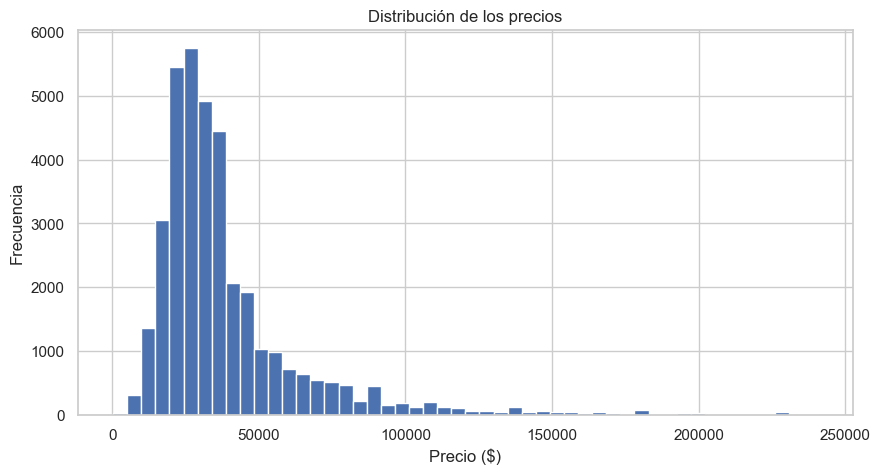

In [2117]:
# Histograma de distribución de precios
plt.figure(figsize=(10, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Distribución de los precios")
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

In [2118]:
# Calcular los cuartiles
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

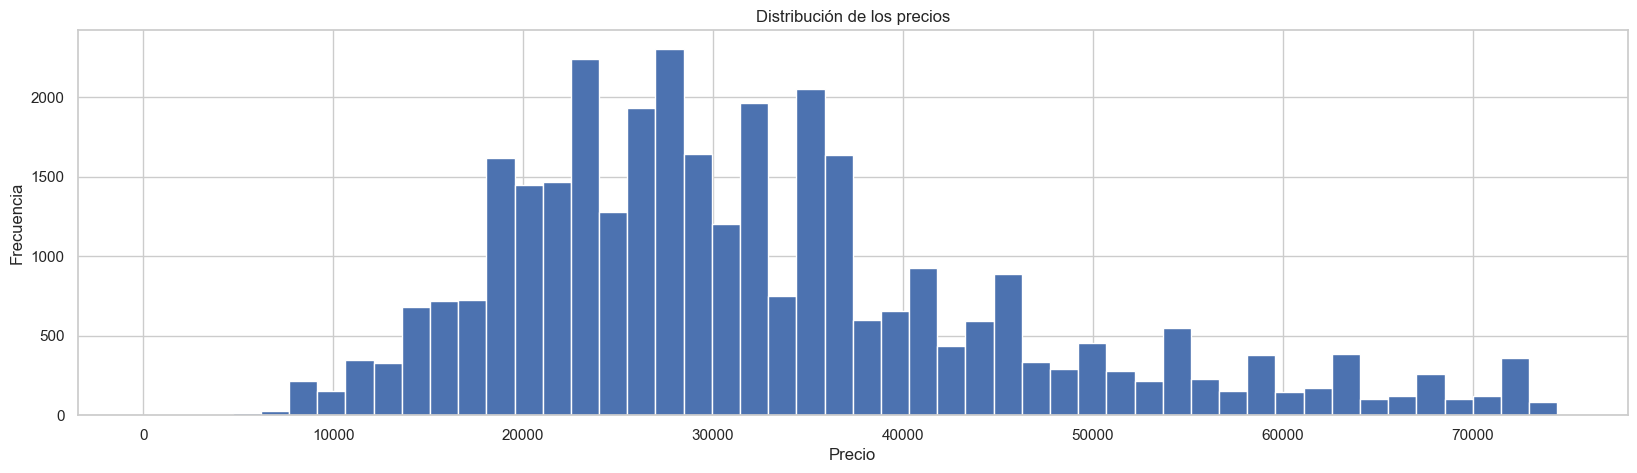

In [2119]:
#Histograma más acotado (sin outliers extremos)
upper_bound = q3 + 1.5 * iqr
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= upper_bound]["price_float"], bins=50)
plt.title("Distribución de los precios")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Realizamos un gráfico de boxplot para observar de manera más clara las medidas de tendencia central.

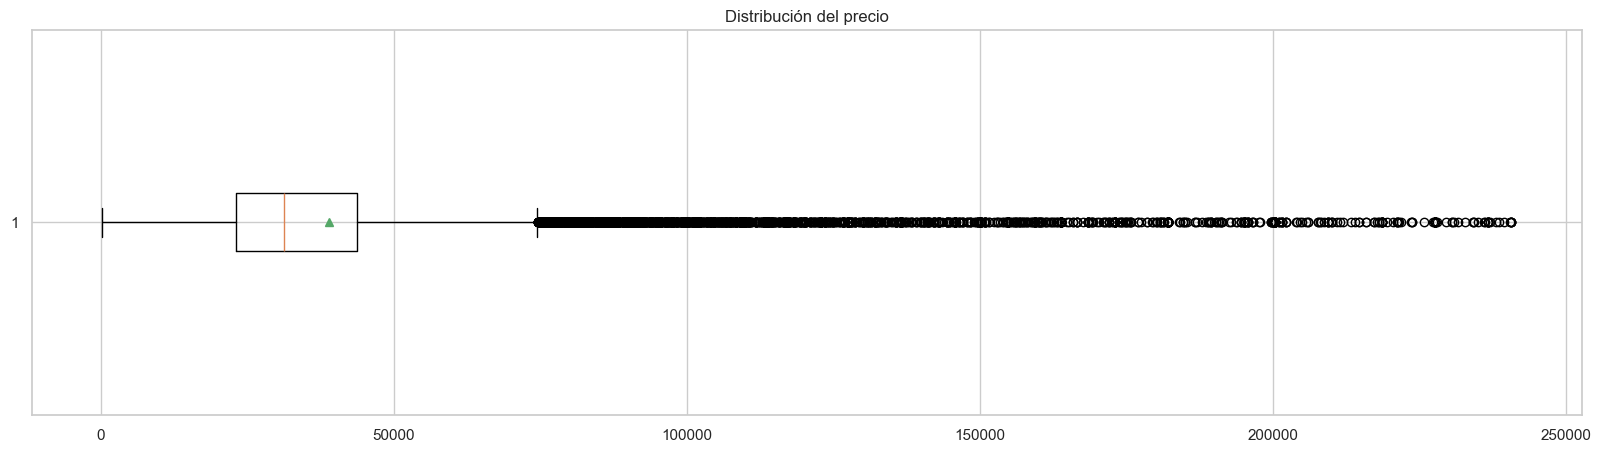

In [2120]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["price_float"], showmeans=True, vert=False, showfliers=True)
plt.title("Distribución del precio")
plt.show()

**4. Atributo Número de Reseñas ('number_of_reviews')**

In [2121]:
print(f"median     {listings_df['number_of_reviews'].median()}")
print(f"mode       {listings_df['number_of_reviews'].mode()[0]}")
listings_df["number_of_reviews"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

median     9.0
mode       0


count   36600.00
mean       23.71
std        40.60
min         0.00
5%          0.00
25%         1.00
50%         9.00
75%        29.00
95%        96.05
max       851.00
Name: number_of_reviews, dtype: float64

Procederemos a realizar un histograma para la visualización de la distribución.
Luego se encontrará el rango intercuartil y se mostrará la distribución en ese rango para tener unas visión más clara de los datos.

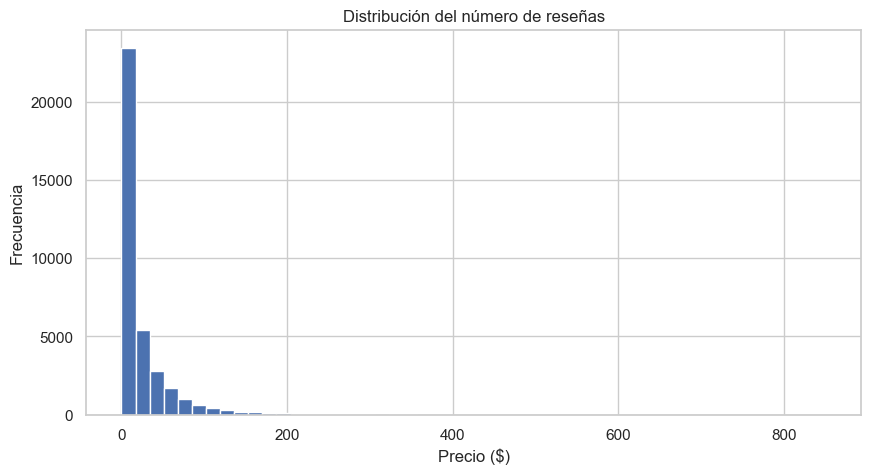

In [2122]:
# Histograma de distribución de precios
plt.figure(figsize=(10, 5))
plt.hist(listings_df["number_of_reviews"], bins=50)
plt.title("Distribución del número de reseñas")
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

In [2123]:
# Calcular los cuartiles
q1 = listings_df["number_of_reviews"].quantile(0.25)
q3 = listings_df["number_of_reviews"].quantile(0.75)
iqr = q3 - q1

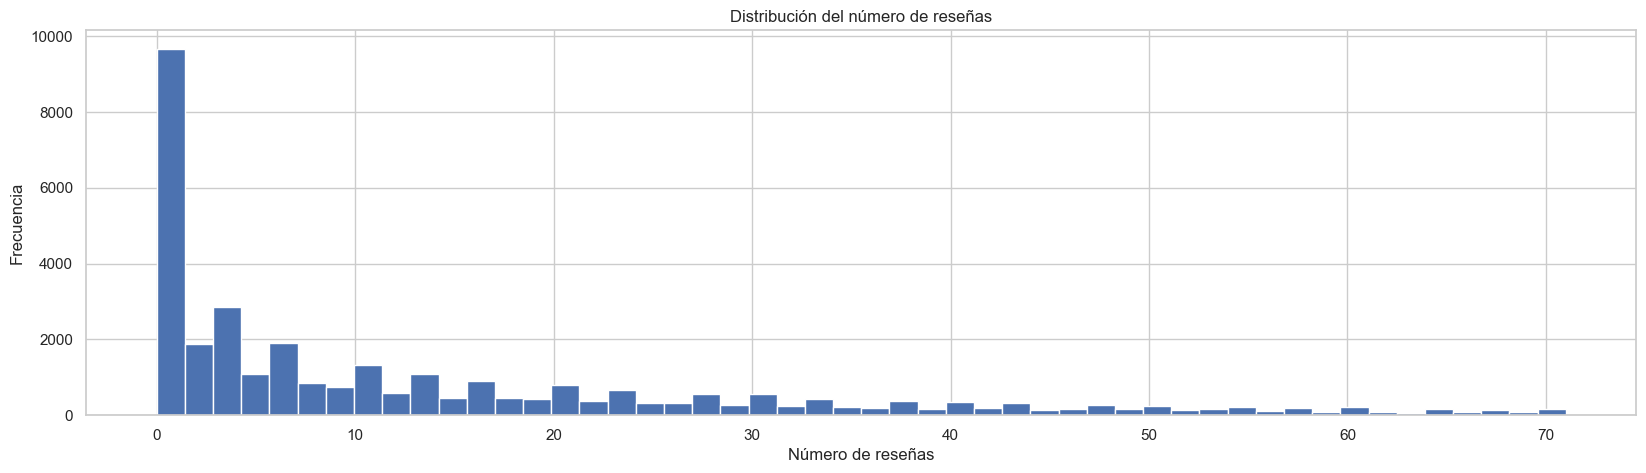

In [2124]:
#Histograma más acotado (sin outliers)
upper_bound = q3 + 1.5 * iqr
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["number_of_reviews"] <= upper_bound]["number_of_reviews"], bins=50)
plt.title("Distribución del número de reseñas")
plt.xlabel('Número de reseñas')
plt.ylabel('Frecuencia')
plt.show()

Realizamos un gráfico de boxplot para observar de manera más clara las medidas de tendencia central.

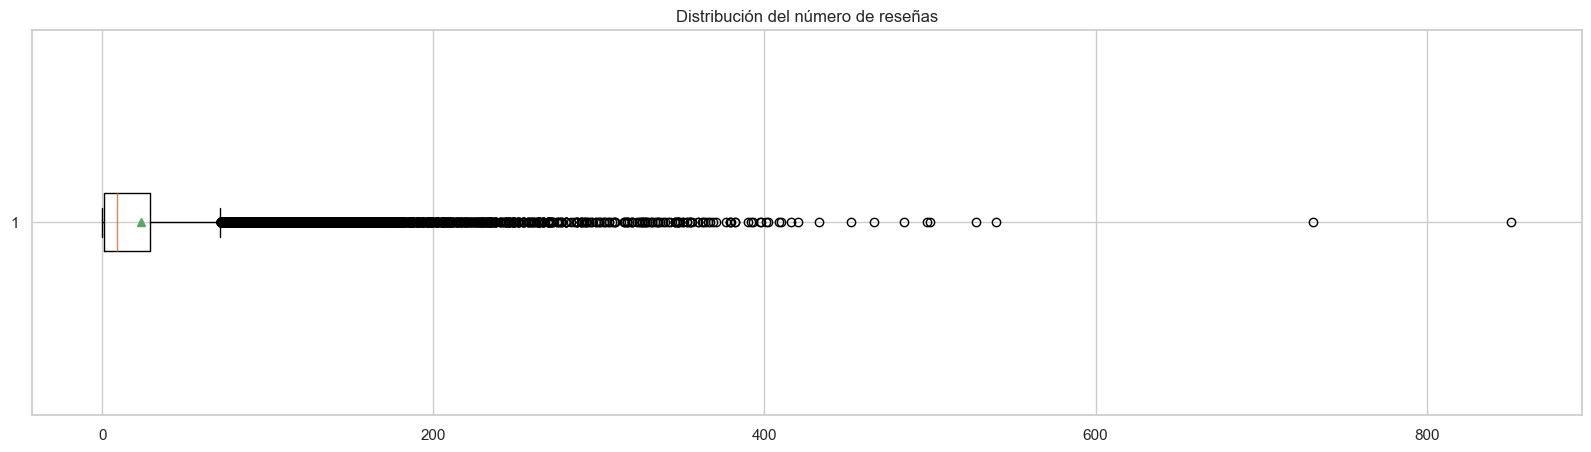

In [2125]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Distribución del número de reseñas")
plt.show()

**5. Atributo Calificación de Reseña Total ('review_scores_rating')**

In [2126]:
print(f"median     {listings_df['review_scores_rating'].median()}")
print(f"mode       {listings_df['review_scores_rating'].mode()[0]}")
listings_df["review_scores_rating"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

median     4.88
mode       5.0


count   36600.00
mean        4.81
std         0.30
min         0.00
5%          4.33
25%         4.77
50%         4.88
75%         4.98
95%         5.00
max         5.00
Name: review_scores_rating, dtype: float64

Los datos son válidos debido a que se encuentran en el **rango de [0, 5]**; por lo tanto, como no existen outliers, no es necesario filtrar por rango intercuartil al momento de realizar gráficos de distribución, en este caso, histogramas.

[]

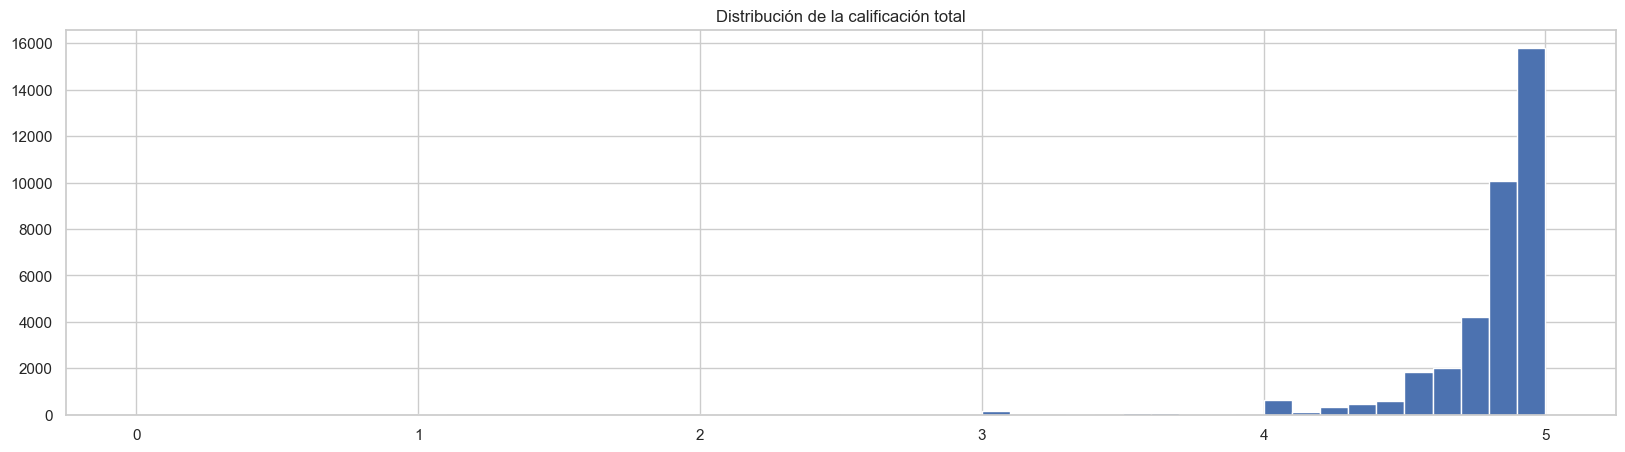

In [2127]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df["review_scores_rating"], bins=50)
plt.title("Distribución de la calificación total")
plt.plot()

Realizamos un gráfico de boxplot para observar de manera más clara las medidas de tendencia central.

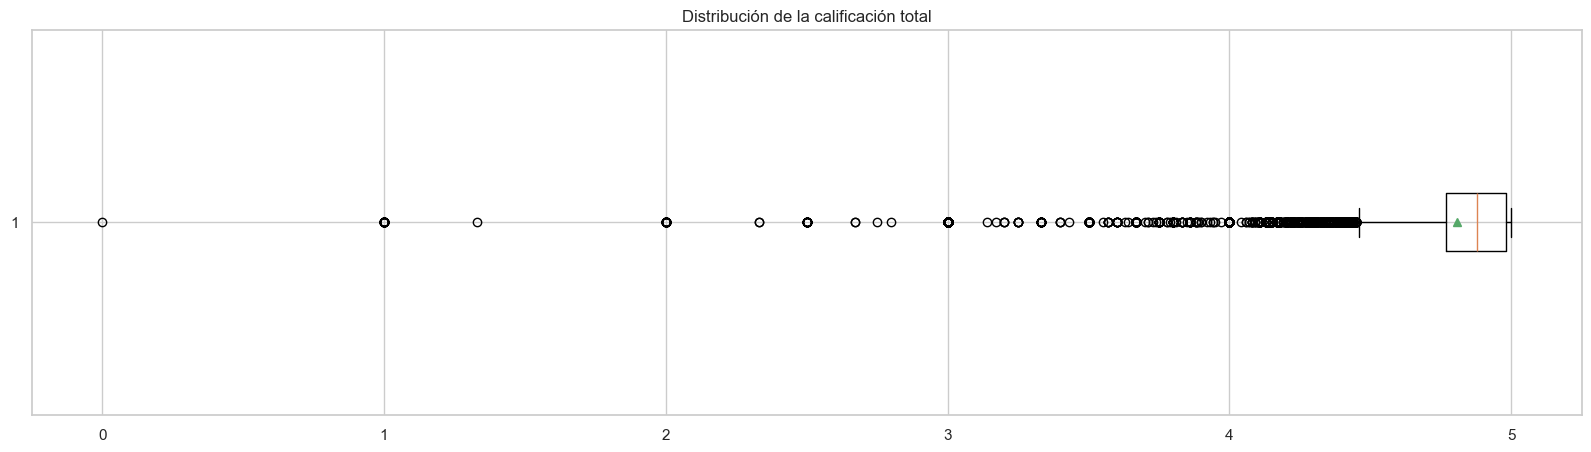

In [2128]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["review_scores_rating"], showmeans=True, vert=False)
plt.title("Distribución de la calificación total")
plt.show()

## 3. Estrategia de análisis:
Describir de manera concreta en uno o dos párrafos la estrategia de análisis y las técnicas que utilizará, con su respectiva justificación, para dar respuesta al requerimiento de establecer la mejor opción de inversión inmobiliaria. 

La estrategia debe contemplar desde el cálculo de estadísticos básicos hasta el uso de técnicas gráficas que involucren varios atributos.

En primer lugar, se planea realizar un análisis de correlación para las variables numéricas y un análisis de Pareto para las variables categóricas con el objetivo de generar un ranking que muestre la influencia de las variables de entrada sobre las variables de salida. 

Este ranking será clave para que el inversionista tome decisiones de inversión informadas, basándose en qué factores afectan más a la rentabilidad futura de la inversión.

Como variables de entrada seleccionamos:

* Barrio (neighbourhood_cleansed): La ubicación es uno de los factores clave en cualquier inversión inmobiliaria, lo que justifica su inclusión.
* Tipo de propiedad (property_type): Es esencial entender el nicho de mercado y qué tipo de propiedades tienen mayor demanda en Buenos Aires.
* Precio (price_float): El precio es un factor determinante en las decisiones de inversión, especialmente en ciudadades metropolitanas como Buenos Aires, donde los costos pueden variar significativamente de acuerdo a varios factores.

Por otro lado, las variables de salida son:

* Número de reseñas (number_of_reviews): Aunque la calificación de una propiedad es importante, estudios sugieren que el número de reseñas puede ser un indicador más relevante a la hora de evaluar el éxito de una propiedad.
* Calificación total (review_scores_rating): Este es un indicador directo de la satisfacción de los huéspedes y, por tanto, una medida clave del rendimiento de la inversión.

Por lo tanto, se llevará a cabo un **análisis bivariado entre cada variable de entrada y las variables de salida**. 

Para las variables numéricas, se utilizarán gráficos de dispersión y se calcularán coeficientes de correlación tanto lineales como monótonos; mientras que para las variables categóricas, se utilizarán gráficos de barras. Con base en estos análisis, se determinarán las opciones de inversión más prometedoras en cada categoría de entrada que maximicen los resultados en las variables de salida.

## 4. Desarrollo de la estrategia:
Implementar la estrategia previamente definida en donde se evidencie claramente cualquier tipo de procesamiento de datos que haya tenido que realizar, las técnicas estadísticas o de visualización de datos utilizadas y los insights extraídos tras la interpretación de los resultados.

### 4.1 Análisis de correlación (Variables numéricas)

En esta parte se quiere analizar si existe una correlación significativa entre la variable 'price_float' y las variables de salida 'number_of_reviews' y 'review_scores_rating'.

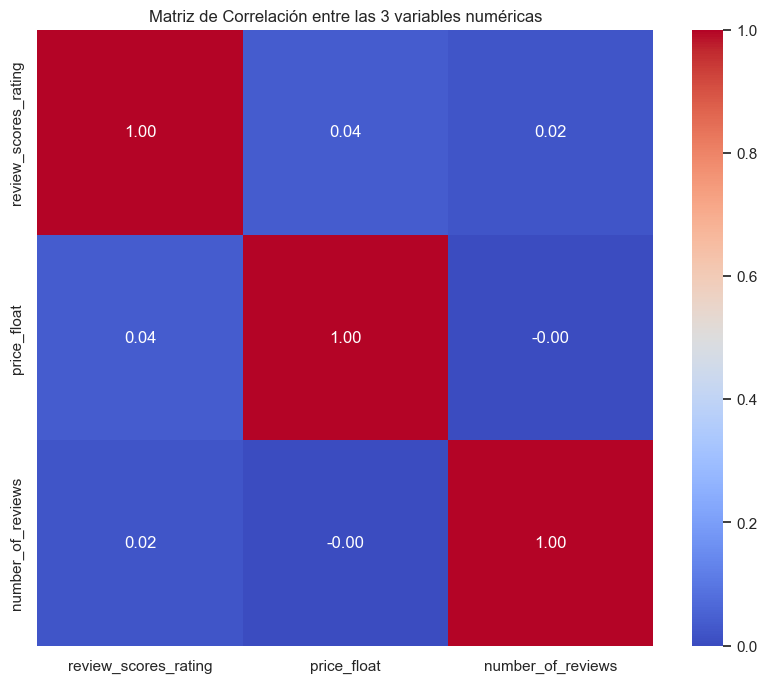

In [2129]:
# Cálculo de la correlación lineal
correlation_matrix = listings_df[["review_scores_rating", "price_float", "number_of_reviews"]].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, vmin=0, vmax=1)
plt.title("Matriz de Correlación entre las 3 variables numéricas")
plt.show()

Podemos concluir de este gráfico que no hay una correlación fuerte entre las variables: Las correlaciones entre las variables numéricas (precio, número de reseñas y calificación total) son cercanas a cero, lo que sugiere que no existe una relación lineal significativa entre estas variables.

Esto podría significar que, al menos para este dataset, el precio de la propiedad no influye directamente en la cantidad de reseñas ni en la calificación total que recibe. Del mismo modo, el número de reseñas no parece tener un efecto significativo sobre la calificación de la propiedad.

En resumen, no hay evidencia de correlación lineal fuerte entre estas variables numéricas, por lo tanto se sugiere que otros factores podrían estar influyendo más en los resultados.

### 4.2 Análisis de pareto (Variables categóricas)
En esta parte se quiere ver la importancia de las dos variables de entrada categóricas ('neighbourhood_cleansed', 'property_type') frente a las variables de salida ('number_of_reviews', 'review_scores_rating'). Para esto se utilizará el test chi-cuadrado de pandas ya que se quiere evaluar si las frecuencias observadas en las categorías de una variable están relacionadas o son independientes de las categorías de otra variable.

Primero haremos el análisis de pareto para la variable 'number_of_reviews':

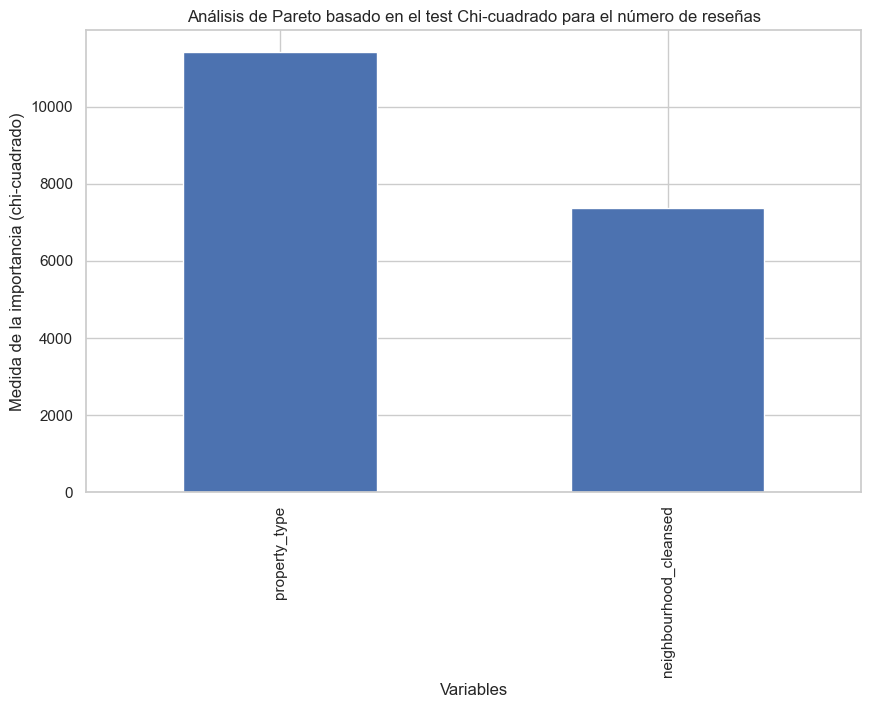

In [2130]:
# Lista de variables categóricas
categorical_vars = ['neighbourhood_cleansed', 'property_type']

# Variable de salida
output_var = 'number_of_reviews'

# Diccionario para almacenar los valores chi-cuadrado para cada variable categórica
chi2_scores = pd.Series(dtype=float)

# Se calcula el test chi-cuadrado para la variable categórica
for cat_var in categorical_vars:
    # Crear tabla de contingencia
    crosstab = pd.crosstab(listings_df[cat_var], listings_df[output_var])
    # Aplicar el test chi-cuadrado
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    # Guardar el valor del chi-cuadrado
    chi2_scores[cat_var] = chi2

# Ordenar las variables por el valor del chi-cuadrado
chi2_scores = chi2_scores.sort_values(ascending=False)

# Gráfico de barras del ranking basado en el test chi-cuadrado
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Medida de la importancia (chi-cuadrado)')
plt.title(f'Análisis de Pareto basado en el test Chi-cuadrado para el número de reseñas')
plt.show()

De acuerdo con esta gráfica notamos que el tipo de propiedad tiene un valor de chi-cuadrado más alto en comparación con el barrio, lo que indica que el tipo de propiedad tiene una mayor influencia en el número de reseñas que recibe una propiedad y por lo tanto podría ser un factor más determinante a la hora de predecir cuántas reseñas tendrá una propiedad, comparado con el barrio en el que se encuentra.

Ahora haremos el análisis de pareto para la variable 'review_scores_rating':

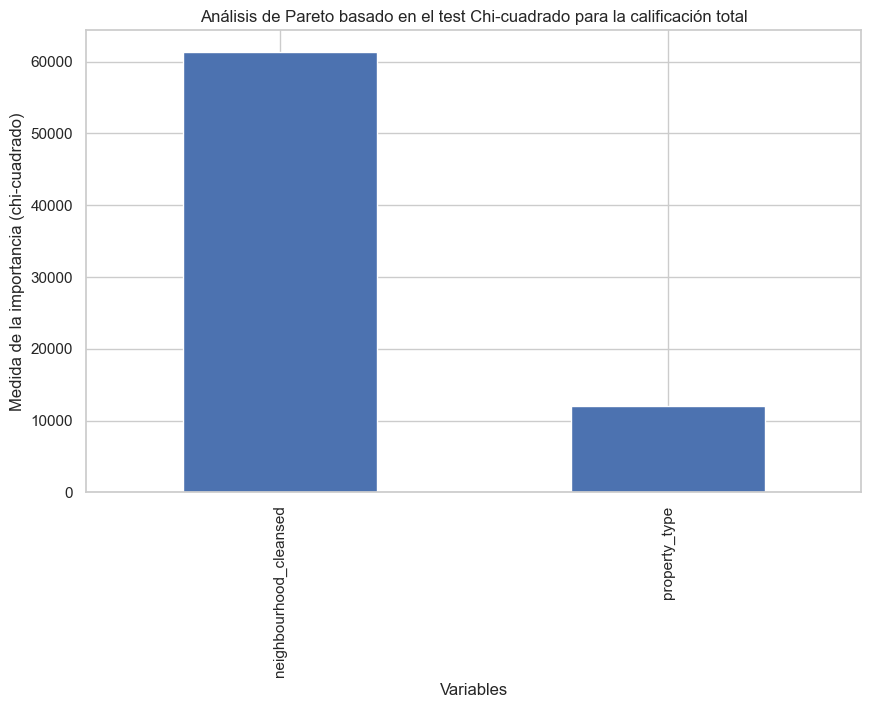

In [2131]:
# Lista de variables categóricas
categorical_vars = ['neighbourhood_cleansed', 'property_type']

# Variable de salida
output_var = 'review_scores_rating'

# Diccionario para almacenar los valores chi-cuadrado para cada variable categórica
chi2_scores = pd.Series(dtype=float)

# Calcular el test chi-cuadrado para cada variable categórica
for cat_var in categorical_vars:
    # Crear tabla de contingencia
    crosstab = pd.crosstab(listings_df[cat_var], listings_df[output_var])
    # Aplicar el test chi-cuadrado
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    # Guardar el valor del chi-cuadrado
    chi2_scores[cat_var] = chi2

# Ordenar las variables por el valor del chi-cuadrado
chi2_scores = chi2_scores.sort_values(ascending=False)

# Gráfico de barras del ranking basado en el test chi-cuadrado
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Medida de la importancia (chi-cuadrado)')
plt.title(f'Análisis de Pareto basado en el test Chi-cuadrado para la calificación total')
plt.show()

De acuerdo con esta gráfica podemos concluir que el barrio tiene un valor de chi-cuadrado significativamente mayor en comparación con el tipo de propiedad. Esto indica que el barrio tiene una mayor influencia en la calificación total de la propiedad, por lo que se puede decir que la ubicación geográfica de la propiedad es más determinante para la calificación total que recibe una propiedad, lo que significa que los huéspedes podrían estar más influenciados por el lugar donde se encuentra la propiedad a la hora de evaluar su experiencia.

## 4.3 Análisis bivariado para variables de entrada numéricas
En esta parte se busca analizar tendencias entre la variable de entrada 'price_float' y las variables de salida 'number_of_reviews' y 'review_scores_rating'. Para esto se harán gráficos de dispersión y se calcularán los coeficientes de correlación lineales (pearson) y monótonos (spearman).

Primero haremos el análisis de la relación entre el precio y el número de reseñas:

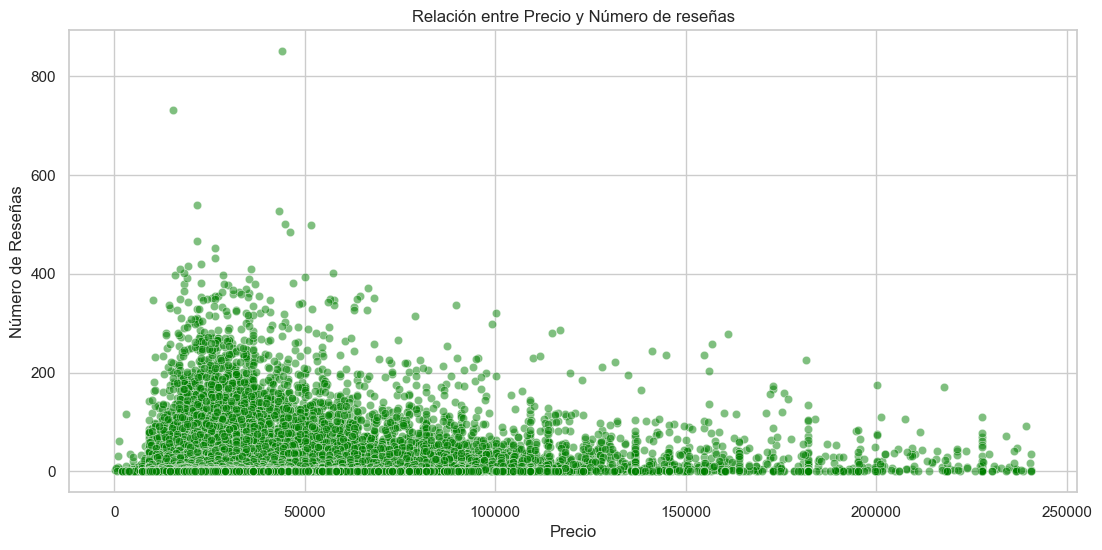

Coeficiente de correlación de Pearson (Precio vs Número de reseñas): -0.0029
Coeficiente de correlación de Spearman (Precio vs Número de reseñas): -0.0183


In [2132]:
# Gráfico de dispersión: Precio vs Número de Reseñas
plt.figure(figsize=(13, 6))
sns.scatterplot(x='price_float', y='number_of_reviews', data=listings_df, color='green', alpha=0.5)
plt.title('Relación entre Precio y Número de reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.show()

# 3. Cálculo del coeficiente de correlación de Pearson y Spearman para Precio y Número de reseñas
pearson_corr_reviews, _ = pearsonr(listings_df['price_float'], listings_df['number_of_reviews'])
spearman_corr_reviews, _ = spearmanr(listings_df['price_float'], listings_df['number_of_reviews'])

print(f"Coeficiente de correlación de Pearson (Precio vs Número de reseñas): {pearson_corr_reviews:.4f}")
print(f"Coeficiente de correlación de Spearman (Precio vs Número de reseñas): {spearman_corr_reviews:.4f}")

De la gráfica podemos concluir que la mayoría de los puntos están concentrados en la parte baja del eje de precios, con valores de precio que parecen estar por debajo de los $50000. Esto indica que la mayoría de los listados tienen precios relativamente bajos.

A su vez vemos que hay una gran cantidad de propiedades con precios bajos (inferiores a $50000) que también tienen un número elevado de reseñas. Sin embargo, conforme el precio aumenta, el número de reseñas tiende a disminuir. Para propiedades con precios muy altos (mayores a $100000), el número de reseñas tiende a ser significativamente más bajo.

Lo anterior podría deberse a que propiedades con precios más accesibles tienen una mayor rotación de clientes, por lo tanto, más reseñas, en cambio, Las propiedades más caras podrían ser más exclusivas, con menos ocupaciones y, por ende, menos reseñas.

De igual forma no parece haber una relación lineal clara entre el precio y el número de reseñas, lo que sugiere que otros factores (además del precio) pueden estar influyendo en la cantidad de reseñas.

In [2133]:
listings_df[['price_float', 'number_of_reviews']].corr()

,price_float,number_of_reviews
price_float,1.00,-0.00
number_of_reviews,-0.00,1.00


In [2134]:
listings_df[['price_float', 'number_of_reviews']].corr("spearman")

,price_float,number_of_reviews
price_float,1.00,-0.02
number_of_reviews,-0.02,1.00


Frente a los valores de las correlaciones podemos concluir:

1. Coeficiente de correlación de Pearson:
 Un valor de -0.00 indica una relación nula entre el precio y el número de reseñas. Esto significa que, al menos de manera lineal, el precio de una propiedad no está relacionado de forma significativa con la cantidad de reseñas que recibe. Es decir, un cambio en el precio no afecta de manera directa la cantidad de reseñas en un sentido claro (ni positivo ni negativo).

2. Coeficiente de correlación de Spearman:
 Un valor de -0.02 indica una relación muy débil, pero negativa. Aunque es más sensible a las tendencias no lineales, este valor sigue siendo cercano a cero, lo que confirma que no hay una tendencia clara en la que, conforme aumenta el precio, el número de reseñas decrezca (o viceversa).

Ahora haremos el análisis de la relación entre el precio y la calificación total:

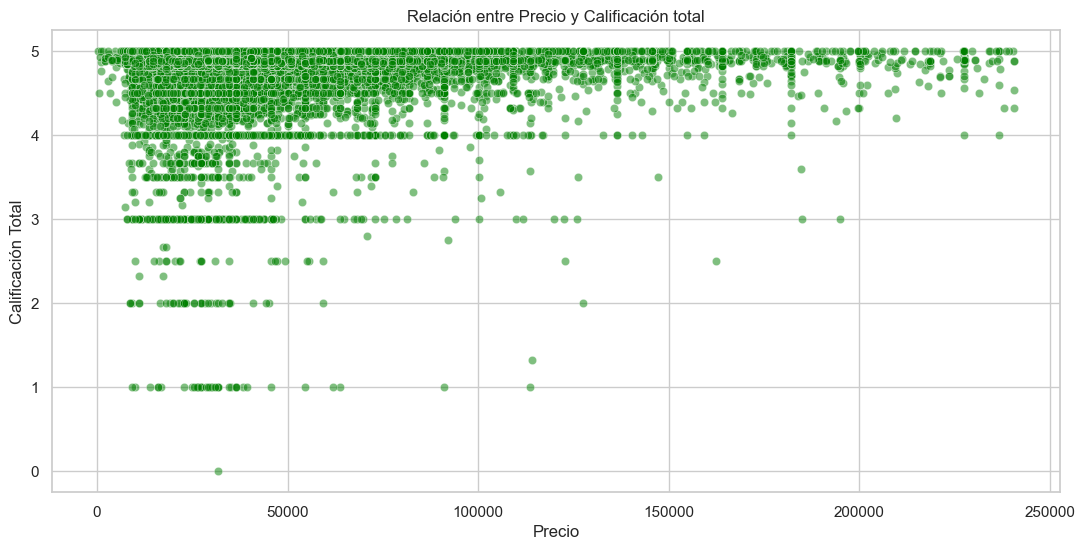

Coeficiente de correlación de Pearson (Precio vs Calificación total): 0.0369
Coeficiente de correlación de Spearman (Precio vs Calificación total): 0.0633


In [2135]:
# Gráfico de dispersión: Precio vs Calificación total
plt.figure(figsize=(13, 6))
sns.scatterplot(x='price_float', y='review_scores_rating', data=listings_df, color='green', alpha=0.5)
plt.title('Relación entre Precio y Calificación total')
plt.xlabel('Precio')
plt.ylabel('Calificación Total')
plt.show()

# 4. Cálculo del coeficiente de correlación de Pearson y Spearman para Precio y Calificación total
pearson_corr_rating, _ = pearsonr(listings_df['price_float'], listings_df['review_scores_rating'])
spearman_corr_rating, _ = spearmanr(listings_df['price_float'], listings_df['review_scores_rating'])

print(f"Coeficiente de correlación de Pearson (Precio vs Calificación total): {pearson_corr_rating:.4f}")
print(f"Coeficiente de correlación de Spearman (Precio vs Calificación total): {spearman_corr_rating:.4f}")

De la gráfica podemos decir que la mayoría de las propiedades tienen una calificación cercana a 4 o 5, lo que indica que la mayoría de los listados en la plataforma tienen una calificación muy alta. Por lo tanto se cree que, independientemente del precio, los anfitriones de AirBnb suelen recibir buenas calificaciones.

Al igual que en la gráfica anterior, la mayoría de las propiedades están agrupadas en precios por debajo de $50000 y, a su vez, conforme los precios aumentan, la cantidad de propiedades disminuye notablemente, lo cual es consistente con lo que se espera en mercados donde los hospedajes más caros son menos comunes.

Hay algunas propiedades con precios muy altos (mayores de 100,000) que tienen calificaciones bajas (incluso por debajo de 3). Esto podría indicar que hay casos en los que un precio elevado no necesariamente se traduce en una experiencia de alta calidad para los usuarios, y estos pueden penalizar esa discrepancia en sus reseñas.

Hay algunos listados con calificaciones significativamente más bajas (por debajo de 3), pero estos parecen ser relativamente poco frecuentes y no muestran un patrón claro con respecto al precio.

Podemos concluir que no parece haber una relación clara entre el precio y la calificación total. Las propiedades con precios más altos también pueden tener calificaciones de 4 o 5, al igual que las propiedades más baratas. Esto sugiere que los clientes tienden a evaluar las propiedades más en función de la experiencia general que del precio (lo que podría indicar que los precios bajos no afectan negativamente la percepción de calidad de la propiedad).

In [2136]:
listings_df[['price_float', 'review_scores_rating']].corr()

,price_float,review_scores_rating
price_float,1.00,0.04
review_scores_rating,0.04,1.00


In [2137]:
listings_df[['price_float', 'review_scores_rating']].corr("spearman")

,price_float,review_scores_rating
price_float,1.00,0.06
review_scores_rating,0.06,1.00


Frente a los valores de las correlaciones podemos concluir:

1. Coeficiente de correlación de Pearson:
Un valor de 0.04 muestra una relación lineal muy débil (casi nula) entre el precio y la calificación total. Esto indica que el precio no tiene prácticamente ningún efecto en la calificación total de las propiedades, confirmando lo observado en la gráfica: las calificaciones altas (4 o 5) son comunes tanto en propiedades baratas como en propiedades caras.

2. Coeficiente de correlación de Spearman:
Un valor de 0.06 muestra que el precio y la calificación total tienen una relación muy débil, casi insignificante. Esto refuerza la idea de que no hay una tendencia clara entre el precio y las calificaciones, ya que los listados pueden obtener cualquier calificación sin importar su precio.

Finalmente se puede decir que ñas calificaciones probablemente se ven más afectadas por factores cualitativos como la calidad del servicio, ubicación, comodidades, o la experiencia general, en lugar de depender del precio. Los usuarios pueden estar dispuestos a pagar más si sienten que la propiedad ofrece un valor acorde a lo que cobran, o pueden estar satisfechos con propiedades más económicas si cumplen con sus expectativas.

## 4.4 Análisis bivariado para variables de entrada categóricas
En esta parte se busca analizar tendencias entre las variables de entrada 'neighbourhood_cleansed' y 'property_type' y las variables de salida 'number_of_reviews' y 'review_scores_rating'. Para esto se realizarán gráficos de barras con los valores de mediana para las variables de salida y el número de entradas en los conjuntos de datos con cada una de las categorías de las variables de entrada. Esto con el fin de no solo fijarse en que las variables de entrada resulten en la maximización de las variables de salida, sino que también existan un número considerable de propiedades con las características deseadas.

que muestren la mediana de las variables de salida para cada categoría de las variables de entrada. Además, se graficará el número de propiedades en cada categoría, con el objetivo de evaluar no solo qué categorías optimizan las variables de salida, sino también si estas categorías contienen un número considerable de propiedades, asegurando que las características deseadas sean representativas en el conjunto de datos.

Primero haremos el análisis con la variable de salida número de reseñas y la variable de entrada barrio.

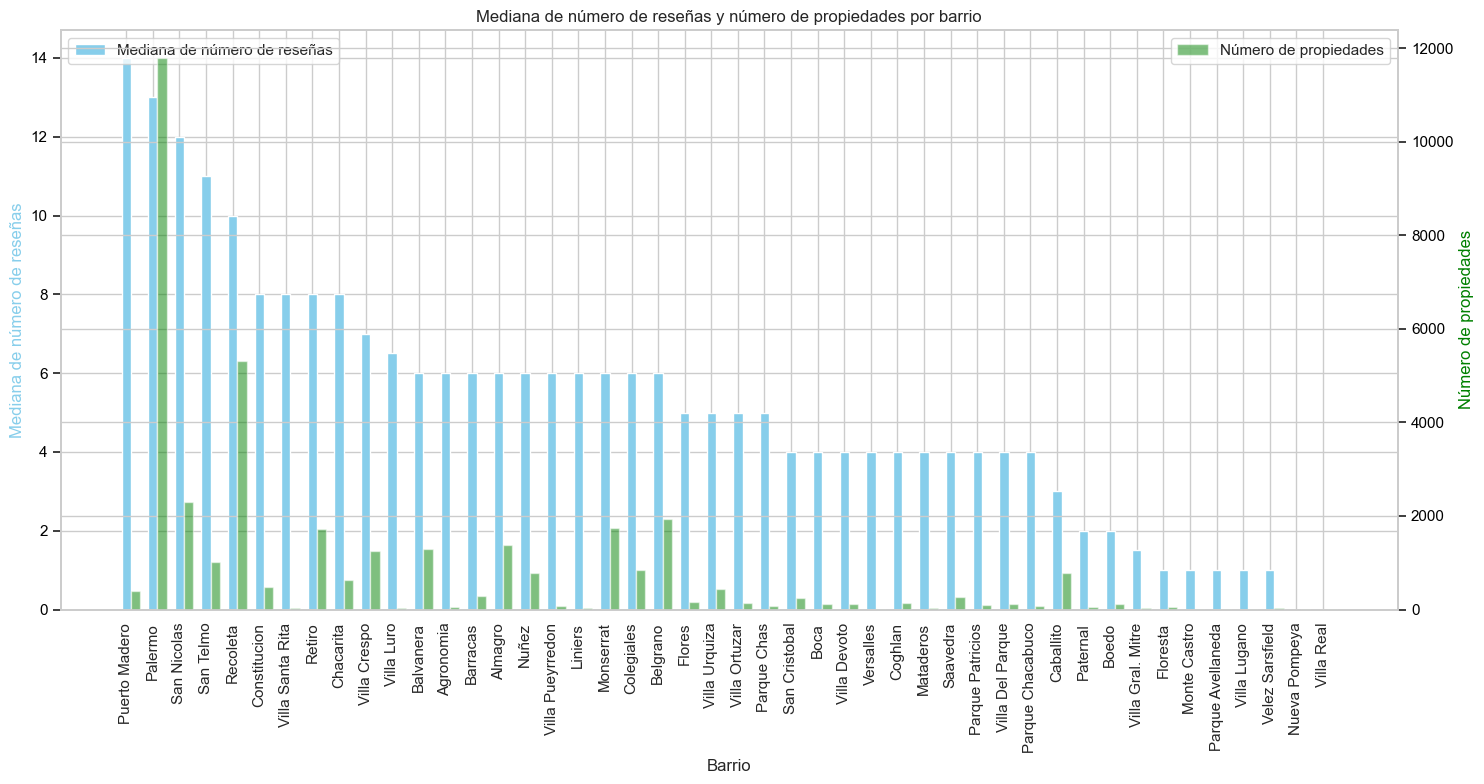

In [2138]:
# Calcular la mediana de 'number_of_reviews' por 'neighbourhood_cleansed'
median_reviews_by_neighbourhood = listings_df.groupby('neighbourhood_cleansed')['number_of_reviews'].median()

# Contar el número de propiedades por 'neighbourhood_cleansed'
count_neighbourhood_appearances = listings_df['neighbourhood_cleansed'].value_counts()

# Ordenar los barrios por la mediana del número de reseñas
median_reviews_by_neighbourhood = median_reviews_by_neighbourhood.sort_values(ascending=False)
count_neighbourhood_appearances = count_neighbourhood_appearances.loc[median_reviews_by_neighbourhood.index]

# Crear gráfico combinado con doble eje Y
fig, ax1 = plt.subplots(figsize=(15, 8))

x = np.arange(len(median_reviews_by_neighbourhood))  # Posiciones en el eje X para las barras
bar_width = 0.35  # Ancho de las barras

# Primer eje Y para la mediana del número de reseñas
ax1.bar(x, median_reviews_by_neighbourhood, width=bar_width, color='skyblue', label='Mediana de número de reseñas')
ax1.set_xlabel('Barrio')
ax1.set_ylabel('Mediana de número de reseñas', color='skyblue')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(median_reviews_by_neighbourhood.index, rotation=90)

# Segundo eje Y para el número de propiedades
ax2 = ax1.twinx()
ax2.bar(x + bar_width, count_neighbourhood_appearances, width=bar_width, color='green', alpha=0.5, label='Número de propiedades')
ax2.set_ylabel('Número de propiedades', color='green')
ax2.tick_params(axis='y', labelcolor='black')

# Título y leyendas
plt.title('Mediana de número de reseñas y número de propiedades por barrio')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfico
plt.tight_layout()
plt.show()


De acuerdo con este gráfico podemos decir que:

1. Los barrios con un mayor número de propiedades como Palermo, San Nicolás y Recoleta son populares y tienen una alta oferta de hospedajes.

2. Los barrios como Puerto Madero, Palermo, San Nicolás y Recoleta también tienen una alta mediana de número de reseñas lo que indica que las propiedades en estos barrios tienden a recibir un número considerable de reseñas. Esto puede estar relacionado con la alta rotación de huéspedes, ya que son áreas populares entre turistas.

    Puerto Madero destaca por tener la mediana más alta de reseñas, aunque tiene un número relativamente bajo de propiedades en comparación con otros barrios. Esto puede sugerir que, aunque no haya tantas propiedades, las que existen tienen una gran visibilidad o atractivo, lo que lleva a una mayor cantidad de reseñas.

3. Los barrios como Nueva Pompeya, Villa Real y Monte Castro tienen un número muy bajo de propiedades lo que indica que son áreas con poca oferta de hospedaje y también tienen una mediana baja de reseñas, lo que puede deberse a la baja oferta y a que no son destinos principales para turistas o visitantes.

4. En algunos barrios, como Caballito y Almagro, aunque hay un número considerable de propiedades, la mediana de reseñas es relativamente baja. Esto podría indicar que las propiedades en estas zonas no están generando tantas reseñas, quizás porque no están tan frecuentadas o no tienen tanta rotación de huéspedes.

Ahora haremos el análisis con la variable de salida número de reseñas y la variable de entrada tipo de propiedad.

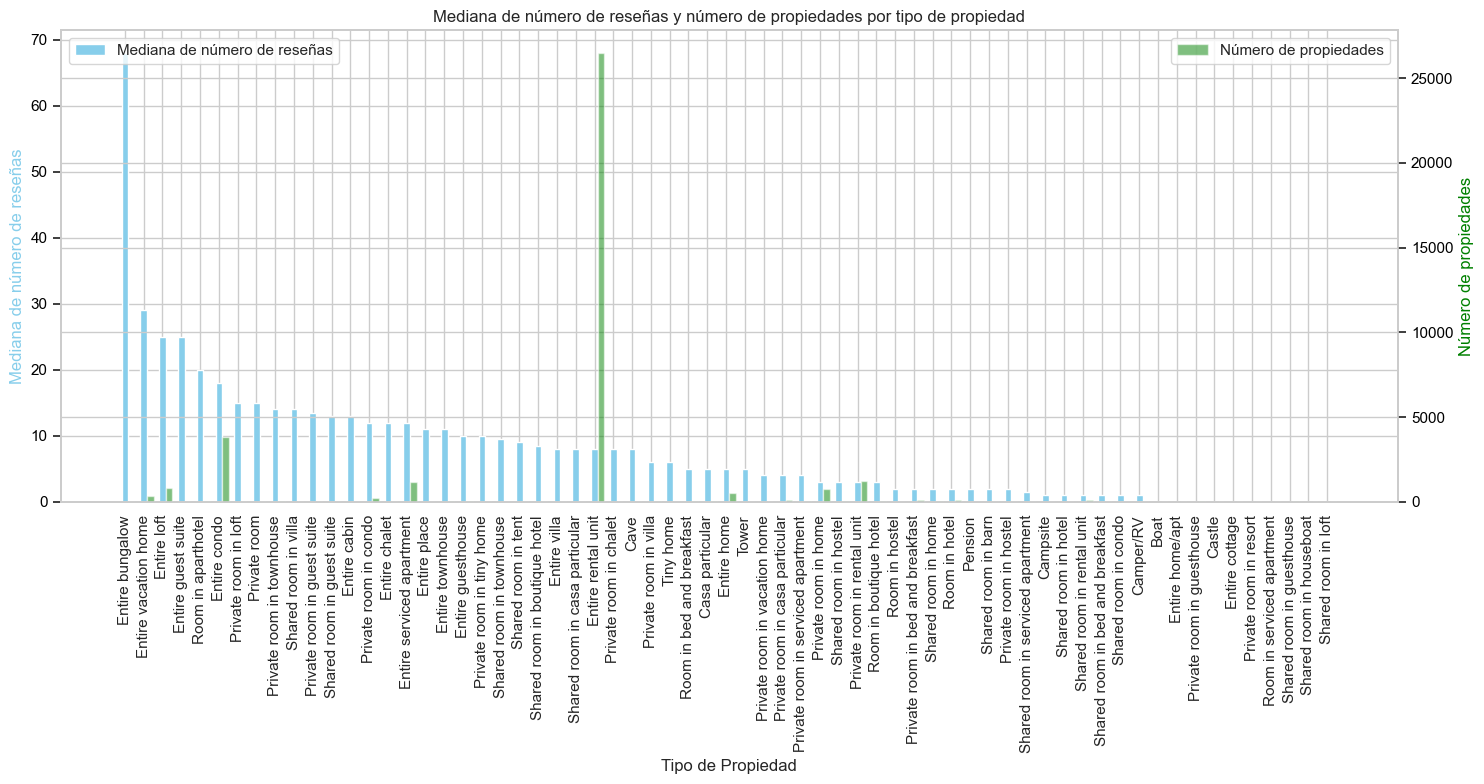

In [2139]:
# Calcular la mediana de 'number_of_reviews' por 'property_type'
median_reviews_by_property_type = listings_df.groupby('property_type')['number_of_reviews'].median()

# Contar el número de propiedades por 'property_type'
count_property_type_appearances = listings_df['property_type'].value_counts()

# Ordenar los tipos de propiedad por la mediana del número de reseñas
median_reviews_by_property_type = median_reviews_by_property_type.sort_values(ascending=False)
count_property_type_appearances = count_property_type_appearances.loc[median_reviews_by_property_type.index]

# Crear gráfico combinado con doble eje Y
fig, ax1 = plt.subplots(figsize=(15, 8))

x = np.arange(len(median_reviews_by_property_type))  # Posiciones en el eje X para las barras
bar_width = 0.35  # Ancho de las barras

# Primer eje Y para la mediana del número de reseñas
ax1.bar(x, median_reviews_by_property_type, width=bar_width, color='skyblue', label='Mediana de número de reseñas')
ax1.set_xlabel('Tipo de Propiedad')
ax1.set_ylabel('Mediana de número de reseñas', color='skyblue')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(median_reviews_by_property_type.index, rotation=90)

# Segundo eje Y para el número de propiedades
ax2 = ax1.twinx()
ax2.bar(x + bar_width, count_property_type_appearances, width=bar_width, color='green', alpha=0.5, label='Número de propiedades')
ax2.set_ylabel('Número de propiedades', color='green')
ax2.tick_params(axis='y', labelcolor='black')

# Título y leyendas
plt.title('Mediana de número de reseñas y número de propiedades por tipo de propiedad')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfico
plt.tight_layout()
plt.show()


Para observar mejores opciones, reduciremos el rango del eje y secundario a 200.

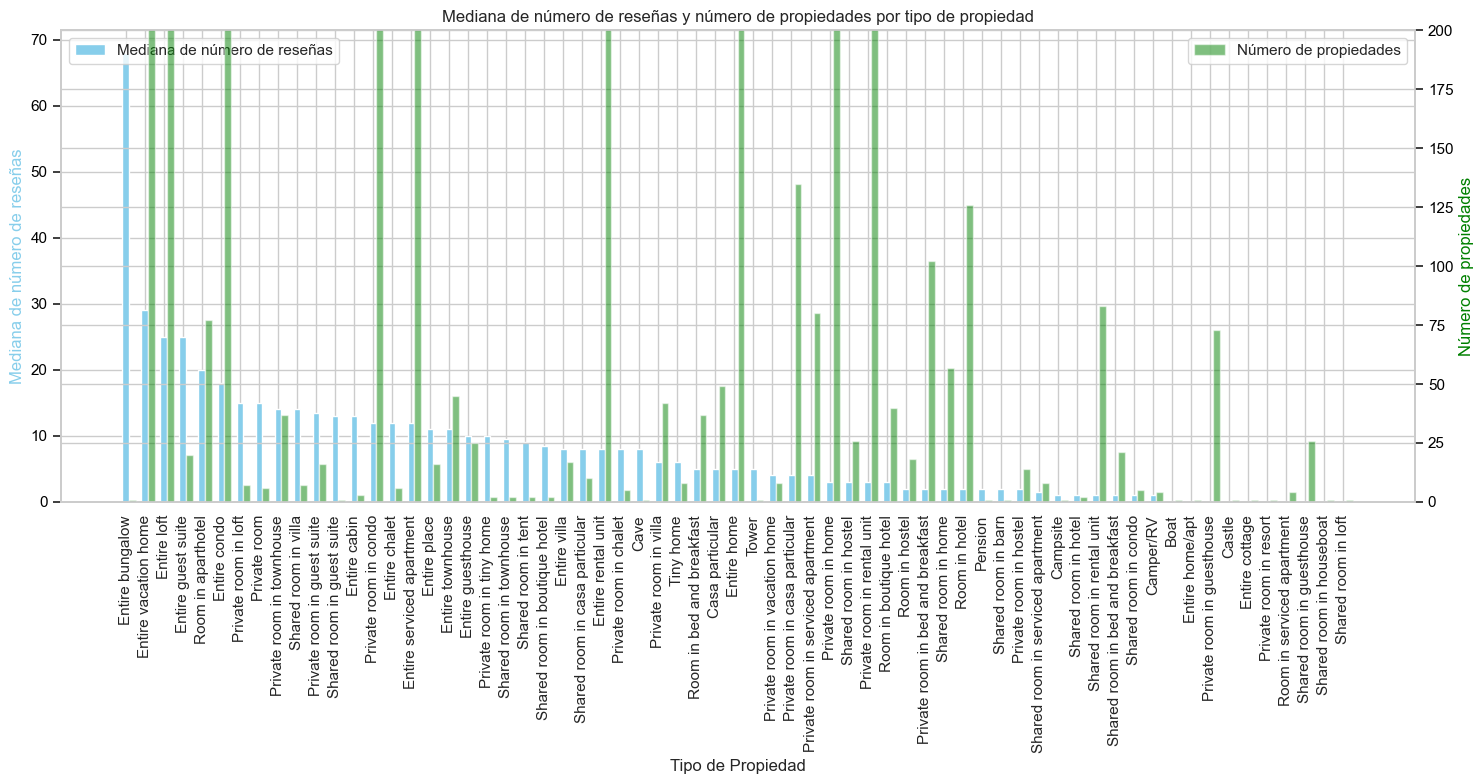

In [2140]:
# Calcular la mediana de 'number_of_reviews' por 'property_type'
median_reviews_by_property_type = listings_df.groupby('property_type')['number_of_reviews'].median()

# Contar el número de propiedades por 'property_type'
count_property_type_appearances = listings_df['property_type'].value_counts()

# Ordenar los tipos de propiedad por la mediana del número de reseñas
median_reviews_by_property_type = median_reviews_by_property_type.sort_values(ascending=False)
count_property_type_appearances = count_property_type_appearances.loc[median_reviews_by_property_type.index]

# Crear gráfico combinado con doble eje Y
fig, ax1 = plt.subplots(figsize=(15, 8))

x = np.arange(len(median_reviews_by_property_type))  # Posiciones en el eje X para las barras
bar_width = 0.35  # Ancho de las barras

# Primer eje Y para la mediana del número de reseñas
ax1.bar(x, median_reviews_by_property_type, width=bar_width, color='skyblue', label='Mediana de número de reseñas')
ax1.set_xlabel('Tipo de Propiedad')
ax1.set_ylabel('Mediana de número de reseñas', color='skyblue')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(x)
ax1.set_xticklabels(median_reviews_by_property_type.index, rotation=90)

# Segundo eje Y para el número de propiedades
ax2 = ax1.twinx()
ax2.bar(x + bar_width, count_property_type_appearances, width=bar_width, color='green', alpha=0.5, label='Número de propiedades')
ax2.set_ylabel('Número de propiedades', color='green')
ax2.set_ylim(top=200)
ax2.tick_params(axis='y', labelcolor='black')

# Título y leyendas
plt.title('Mediana de número de reseñas y número de propiedades por tipo de propiedad')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfico
plt.tight_layout()
plt.show()


De acuerdo con este gráfico final podemos concluir que:

1. Entire bungalow es el tipo de propiedad que tiene la mediana más alta de número de reseñas, por lo que sugiere que, aunque no hay muchas propiedades de este tipo, las que existen tienden a recibir una cantidad considerable de reseñas.

    Otras propiedades como Entire vacation home, Entire loft, y Entire guest suite también tienen una mediana alta de reseñas, lo que podría indicar que son opciones populares entre los usuarios de la plataforma cuando buscan privacidad o una experiencia completa.

2. Private room in apartment es, con diferencia, el tipo de propiedad con el mayor número de propiedades, pero su mediana de reseñas es relativamente baja en comparación con otras propiedades. Lo cual sugiere que, aunque hay muchas propiedades de este tipo, no reciben tantas reseñas como otros tipos de propiedad o no todas ellas están generando una alta interacción y no tienen una rotación tan rápida

    Otros tipos como Entire apartment y Private room in condo también tienen un alto número de propiedades, pero su mediana de reseñas no es particularmente alta.


4. Algunos tipos de propiedad, como Shared room in casa particular y Private room in loft, tienen una baja mediana de reseñas y también un bajo número de propiedades, lo que sugiere que no son muy comunes ni particularmente populares.

    Otros tipos de propiedades menos comunes como Boat, Castle, y Camper/RV tienen tanto un bajo número de propiedades como una baja mediana de reseñas, lo que puede deberse a que son opciones más exclusivas o menos convencionales.

De igual manera haremos el análisis con la variable de calificación total y la variable de entrada barrio:

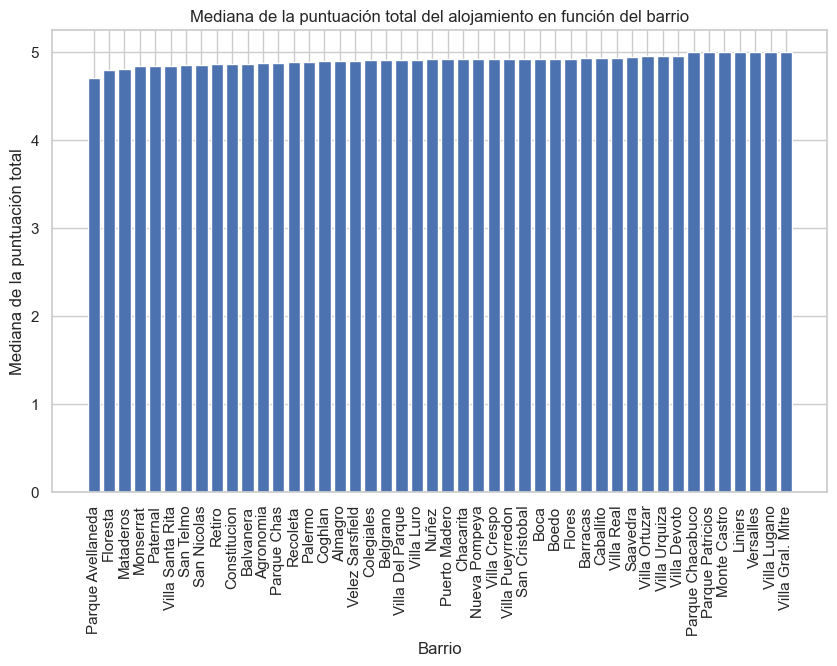

In [2141]:
median_reviews = listings_df.groupby('neighbourhood_cleansed')['review_scores_rating'].median().reset_index()
median_reviews = median_reviews.sort_values('review_scores_rating')

plt.figure(figsize=(10, 6))
plt.bar(median_reviews['neighbourhood_cleansed'], median_reviews['review_scores_rating'])
plt.xlabel('Barrio')
plt.ylabel('Mediana de la puntuación total')
plt.title('Mediana de la puntuación total del alojamiento en función del barrio')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Podemos concluir de este gráfico que las calificaciones son consistentemente altas en prácticamente todos los barrios, lo que sugiere que la ubicación no afecta considerablemente las reseñas que los huéspedes dan a los alojamientos. Esto indica una experiencia generalmente positiva en la mayoría de las zonas y un sesgo hacia puntuaciones altas en las reseñas.

Finalemente haremos el análisis con la variable de salida tipo de propiedad y la variable de entrada puntuación total

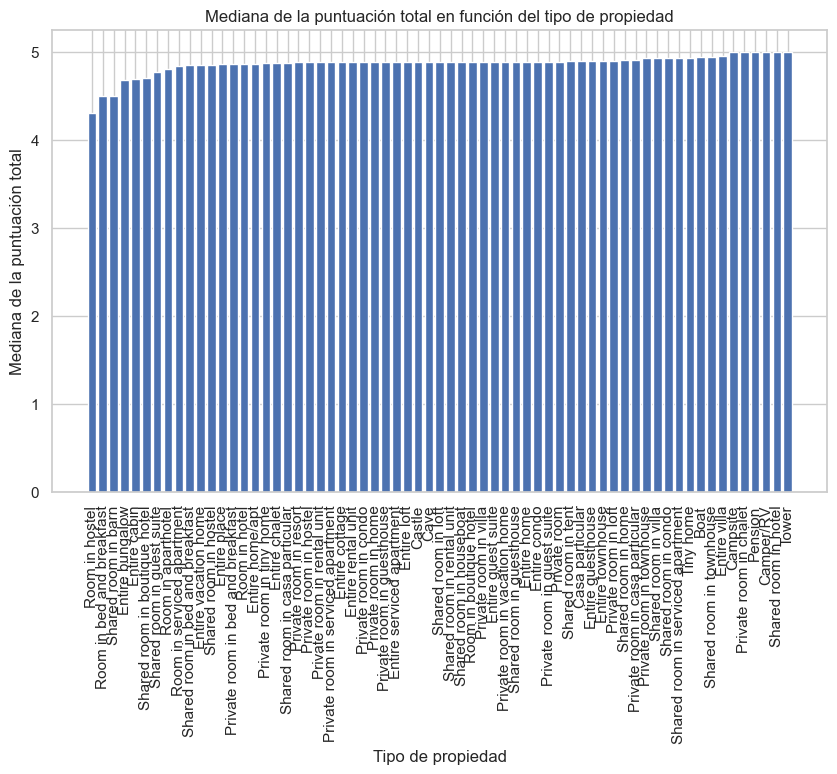

In [2142]:
median_reviews = listings_df.groupby('property_type')['review_scores_rating'].median().reset_index()
median_reviews = median_reviews.sort_values('review_scores_rating')

plt.figure(figsize=(10, 6))
plt.bar(median_reviews['property_type'], median_reviews['review_scores_rating'])
plt.xlabel('Tipo de propiedad')
plt.ylabel('Mediana de la puntuación total')
plt.title('Mediana de la puntuación total en función del tipo de propiedad')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

De esta gráfica final podemos decir que:
1. La mayoría de los tipos de propiedad reciben puntuaciones muy altas (cercanas a 5), lo que sugiere que los huéspedes generalmente tienen experiencias positivas sin importar el tipo de propiedad.
2. Las propiedades compartidas y alojamientos más económicos, como hostales y habitaciones compartidas, tienden a recibir calificaciones ligeramente más bajas, lo que indica que los huéspedes podrían no estar tan satisfechos con estas opciones en comparación con las propiedades privadas o completas.
3. Este gráfico refuerza la idea de que, aunque la calidad general del alojamiento es alta, las propiedades que ofrecen más privacidad y comodidades completas tienden a ser mejor valoradas.

## 4.5 Insights obtenidos del análisis de datos:

1. A partir del análisis de número de reseñas y la cantidad de propiedades disponibles, barrios como Palermo, San Nicolás, Recoleta y Puerto Madero muestran una alta demanda, lo que indica que las propiedades en estas zonas tienen mayor rotación y generan más interacción con los huéspedes. Invertir en estos barrios maximiza la posibilidad de ocupación constante y reseñas frecuentes, fundamentales para mejorar la visibilidad en plataformas como Airbnb.

2. El análisis mostró que las propiedades con un precio menor a USD$1000 por noche generan un mayor número de reseñas, ya que son más accesibles para un mayor número de huéspedes. Mantener un precio competitivo en este rango permite captar más reservas, lo que lleva a una mayor ocupación sin sacrificar las reseñas, un factor crucial para la visibilidad en plataformas de alquiler.

3. El análisis de mediana de reseñas por tipo de propiedad revela que las private rooms (habitaciones privadas) en townhouses, homes, hostels y lofts tienen un alto número de reseñas en comparación con las entire rental units (propiedades completas), que parecen estar saturadas en el mercado y no garantizan tantas reseñas. Invertir en tipos de propiedades con menos saturación permite captar más reseñas, lo que aumenta la visibilidad y, en consecuencia, las reservas.

4. El análisis de las calificaciones mostró que las propiedades completas y privadas tienen mejores puntuaciones en general, lo que refleja una mayor satisfacción del huésped. En contraste, los alojamientos compartidos (shared rooms) tienden a recibir calificaciones más bajas, lo que sugiere una experiencia menos favorable para los huéspedes. Invertir en propiedades mejor valoradas asegura una reputación sólida y un flujo constante de reservas.

## 5. Generación de resultados
En el repositorio de GitHub se encuentra el informe ejecutivo con los principales insights del análisis realizado.